In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [19]:
# Build nonlinear and (short or) long-distance dataset

T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    #x sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # y sequence
    #y = get_label(x,-1,-2,-3) #short distance
    y = get_label(x,0,1,2) #long distance
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

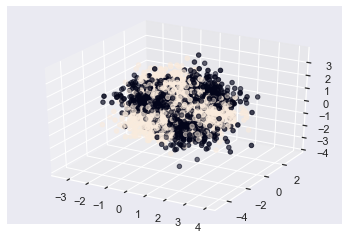

In [20]:
from mpl_toolkits.mplot3d import Axes3D
 # Run xor3D.py for full visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

In [11]:
#build linear model (should fail)
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr=0.01),
    metrics = ['accuracy']
)

r = model.fit(
    X, Y, epochs =100,
    validation_split=0.5

)

Epoch 1/100
79/79 [==============================] - 2s 31ms/step - loss: 0.7905 - accuracy: 0.5176 - val_loss: 0.7167 - val_accuracy: 0.4936
Epoch 2/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6967 - accuracy: 0.5132 - val_loss: 0.7002 - val_accuracy: 0.5024
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6925 - accuracy: 0.5272 - val_loss: 0.6973 - val_accuracy: 0.5120
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6919 - accuracy: 0.5284 - val_loss: 0.6979 - val_accuracy: 0.4944
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6925 - accuracy: 0.5240 - val_loss: 0.6975 - val_accuracy: 0.5024
Epoch 6/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.5184 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 7/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6969 - val_accuracy: 0.5024
Epoch 8/10

79/79 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5300 - val_loss: 0.6969 - val_accuracy: 0.4996
Epoch 59/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5240 - val_loss: 0.6982 - val_accuracy: 0.4892
Epoch 60/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5132 - val_loss: 0.6984 - val_accuracy: 0.4988
Epoch 61/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5316 - val_loss: 0.6969 - val_accuracy: 0.5064
Epoch 62/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5168 - val_loss: 0.6978 - val_accuracy: 0.5016
Epoch 63/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5212 - val_loss: 0.6966 - val_accuracy: 0.5088
Epoch 64/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5288 - val_loss: 0.6972 - val_accuracy: 0.5080
Epoch 65/100
79/79 

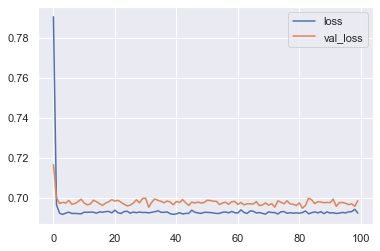

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

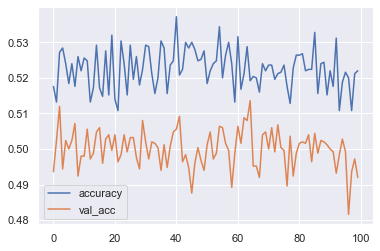

In [13]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [26]:
# Try a simple RNN

inputs  = np.expand_dims(X,-1)

i = Input(shape=(T,D))
 
#Method 1
x = LSTM(5)(i)
#x = SimpleRNN(5)(i)
# x = GRU(5)(i) 

#Method2
# x = LSTM(5,return_sequences=True)(i)
# x = GlobalMaxPool1D(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    #optimizer = 'rmsprop',
    #optimzer = 'adam',
    optimizer = Adam(lr=0.01),
    #optimizer = SGD(lr=0.1, momentum =0.9),
    metrics = ['accuracy']
)

In [27]:
r = model.fit(
    inputs, Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 3s 37ms/step - loss: 0.6937 - accuracy: 0.5096 - val_loss: 0.6976 - val_accuracy: 0.5068
Epoch 2/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6936 - val_accuracy: 0.4988
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6920 - accuracy: 0.5248 - val_loss: 0.6954 - val_accuracy: 0.5072
Epoch 4/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6924 - accuracy: 0.5160 - val_loss: 0.6938 - val_accuracy: 0.4932
Epoch 5/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6925 - accuracy: 0.5152 - val_loss: 0.6951 - val_accuracy: 0.5056
Epoch 6/200
79/79 [==============================] - 2s 21ms/step - loss: 0.6919 - accuracy: 0.5196 - val_loss: 0.6945 - val_accuracy: 0.5020
Epoch 7/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6915 - accuracy: 0.5200 - val_loss: 0.6937 - val_accuracy: 0.4960
Epoch 

79/79 [==============================] - 2s 21ms/step - loss: 0.0551 - accuracy: 0.9844 - val_loss: 0.0654 - val_accuracy: 0.9828
Epoch 59/200
79/79 [==============================] - 2s 21ms/step - loss: 0.0499 - accuracy: 0.9860 - val_loss: 0.0532 - val_accuracy: 0.9868 - ac
Epoch 60/200
79/79 [==============================] - 2s 26ms/step - loss: 0.0527 - accuracy: 0.9872 - val_loss: 0.1050 - val_accuracy: 0.9740
Epoch 61/200
79/79 [==============================] - 2s 20ms/step - loss: 0.0538 - accuracy: 0.9848 - val_loss: 0.0531 - val_accuracy: 0.9844
Epoch 62/200
79/79 [==============================] - 1s 19ms/step - loss: 0.0442 - accuracy: 0.9888 - val_loss: 0.0472 - val_accuracy: 0.9876
Epoch 63/200
79/79 [==============================] - 2s 20ms/step - loss: 0.0399 - accuracy: 0.9908 - val_loss: 0.0512 - val_accuracy: 0.9848
Epoch 64/200
79/79 [==============================] - 1s 17ms/step - loss: 0.0465 - accuracy: 0.9872 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 6

79/79 [==============================] - 1s 16ms/step - loss: 0.0290 - accuracy: 0.9920 - val_loss: 0.0286 - val_accuracy: 0.9908
Epoch 116/200
79/79 [==============================] - 1s 18ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0508 - val_accuracy: 0.9820
Epoch 117/200
79/79 [==============================] - 2s 24ms/step - loss: 0.0374 - accuracy: 0.9860 - val_loss: 0.0416 - val_accuracy: 0.9848
Epoch 118/200
79/79 [==============================] - 1s 18ms/step - loss: 0.0394 - accuracy: 0.9852 - val_loss: 0.0315 - val_accuracy: 0.9896
Epoch 119/200
79/79 [==============================] - 1s 17ms/step - loss: 0.0249 - accuracy: 0.9908 - val_loss: 0.0239 - val_accuracy: 0.9900
Epoch 120/200
79/79 [==============================] - 1s 14ms/step - loss: 0.0207 - accuracy: 0.9940 - val_loss: 0.0248 - val_accuracy: 0.9912
Epoch 121/200
79/79 [==============================] - 1s 16ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0253 - val_accuracy: 0.9892
Epoch 

Epoch 172/200
79/79 [==============================] - 2s 24ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0196 - val_accuracy: 0.9940
Epoch 173/200
79/79 [==============================] - 2s 19ms/step - loss: 0.0911 - accuracy: 0.9820 - val_loss: 0.0908 - val_accuracy: 0.9848
Epoch 174/200
79/79 [==============================] - 2s 20ms/step - loss: 0.0842 - accuracy: 0.9808 - val_loss: 0.0753 - val_accuracy: 0.9828
Epoch 175/200
79/79 [==============================] - 2s 19ms/step - loss: 0.0823 - accuracy: 0.9788 - val_loss: 0.0741 - val_accuracy: 0.9796
Epoch 176/200
79/79 [==============================] - 1s 18ms/step - loss: 0.0632 - accuracy: 0.9856 - val_loss: 0.0516 - val_accuracy: 0.9844
Epoch 177/200
79/79 [==============================] - 1s 18ms/step - loss: 0.0352 - accuracy: 0.9904 - val_loss: 0.0417 - val_accuracy: 0.9892
Epoch 178/200
79/79 [==============================] - 1s 18ms/step - loss: 0.0278 - accuracy: 0.9924 - val_loss: 0.0352 - val_accuracy:

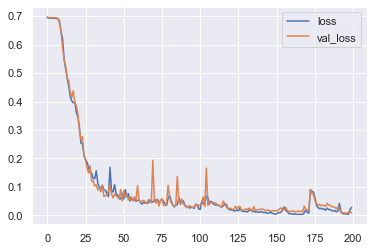

In [28]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

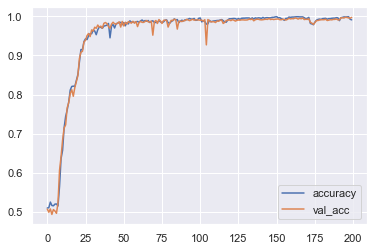

In [29]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [ ]:
# Make Sequence longer

T = 30
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # y sequence
    #y = get_label(x,-1,-2,-3) #short distance
    y = get_label(x,0,1,2) #long distance
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [31]:
# Try a simple RNN

inputs  = np.expand_dims(X,-1)

i = Input(shape=(T,D))
 
#Method 1
# x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU(5)(i) 

#Method2
x = LSTM(5,return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    #optimizer = 'rmsprop',
    #optimzer = 'adam',
    optimizer = Adam(lr=0.01),
    #optimizer = SGD(lr=0.1, momentum =0.9),
    metrics = ['accuracy']
)

In [32]:
r = model.fit(
    inputs, Y,
    epochs = 100,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 3s 33ms/step - loss: 0.6927 - accuracy: 0.5188 - val_loss: 0.6926 - val_accuracy: 0.4992
Epoch 2/200
79/79 [==============================] - 2s 21ms/step - loss: 0.6929 - accuracy: 0.5172 - val_loss: 0.6920 - val_accuracy: 0.5008
Epoch 3/200
79/79 [==============================] - 2s 29ms/step - loss: 0.6904 - accuracy: 0.5236 - val_loss: 0.6864 - val_accuracy: 0.5384
Epoch 4/200
79/79 [==============================] - 2s 27ms/step - loss: 0.6804 - accuracy: 0.5640 - val_loss: 0.6811 - val_accuracy: 0.5552
Epoch 5/200
79/79 [==============================] - 2s 31ms/step - loss: 0.6557 - accuracy: 0.6228 - val_loss: 0.6408 - val_accuracy: 0.6260
Epoch 6/200
79/79 [==============================] - 2s 28ms/step - loss: 0.6304 - accuracy: 0.6416 - val_loss: 0.6278 - val_accuracy: 0.6276
Epoch 7/200
79/79 [==============================] - 2s 22ms/step - loss: 0.6141 - accuracy: 0.6564 - val_loss: 0.6064 - val_accuracy: 0.6580
Epoch 

79/79 [==============================] - 2s 19ms/step - loss: 0.1102 - accuracy: 0.9684 - val_loss: 0.1231 - val_accuracy: 0.9632
Epoch 59/200
79/79 [==============================] - 1s 19ms/step - loss: 0.1054 - accuracy: 0.9700 - val_loss: 0.1293 - val_accuracy: 0.9604
Epoch 60/200
79/79 [==============================] - 2s 20ms/step - loss: 0.1122 - accuracy: 0.9652 - val_loss: 0.1079 - val_accuracy: 0.9672
Epoch 61/200
79/79 [==============================] - 2s 20ms/step - loss: 0.1043 - accuracy: 0.9684 - val_loss: 0.1088 - val_accuracy: 0.9672
Epoch 62/200
79/79 [==============================] - 2s 20ms/step - loss: 0.1004 - accuracy: 0.9712 - val_loss: 0.1061 - val_accuracy: 0.9672
Epoch 63/200
79/79 [==============================] - 2s 21ms/step - loss: 0.0965 - accuracy: 0.9696 - val_loss: 0.1272 - val_accuracy: 0.9608
Epoch 64/200
79/79 [==============================] - 2s 24ms/step - loss: 0.0956 - accuracy: 0.9720 - val_loss: 0.1044 - val_accuracy: 0.9692
Epoch 65/200

79/79 [==============================] - 1s 16ms/step - loss: 0.0302 - accuracy: 0.9896 - val_loss: 0.0520 - val_accuracy: 0.9828
Epoch 116/200
79/79 [==============================] - 1s 15ms/step - loss: 0.0363 - accuracy: 0.9872 - val_loss: 0.0428 - val_accuracy: 0.9880
Epoch 117/200
79/79 [==============================] - 1s 16ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0468 - val_accuracy: 0.9852
Epoch 118/200
79/79 [==============================] - 1s 18ms/step - loss: 0.0331 - accuracy: 0.9884 - val_loss: 0.0639 - val_accuracy: 0.9832
Epoch 119/200
79/79 [==============================] - 1s 17ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 120/200
79/79 [==============================] - 1s 15ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0474 - val_accuracy: 0.9864
Epoch 121/200
79/79 [==============================] - 1s 16ms/step - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0477 - val_accuracy: 0.9864
Epoch 

Epoch 172/200
79/79 [==============================] - 1s 16ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0246 - val_accuracy: 0.9932
Epoch 173/200
79/79 [==============================] - 1s 15ms/step - loss: 0.0120 - accuracy: 0.9956 - val_loss: 0.0307 - val_accuracy: 0.9908
Epoch 174/200
79/79 [==============================] - 1s 15ms/step - loss: 0.0219 - accuracy: 0.9924 - val_loss: 0.0325 - val_accuracy: 0.9904
Epoch 175/200
79/79 [==============================] - 1s 15ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0229 - val_accuracy: 0.9936
Epoch 176/200
79/79 [==============================] - 1s 14ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 177/200
79/79 [==============================] - 1s 16ms/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0236 - val_accuracy: 0.9936
Epoch 178/200
79/79 [==============================] - 1s 16ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0213 - val_accuracy:

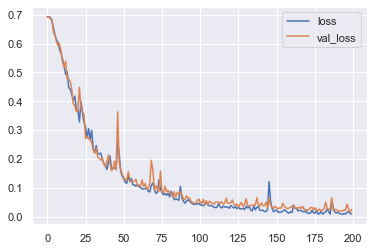

In [33]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

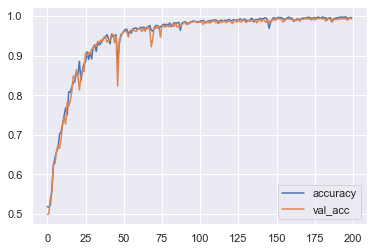

In [34]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()